In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# We will be using Sequential model with Convolution layer, Dense Layer and MaxPooling layer
model = Sequential()

In [3]:
# Preprocessing
model.add(Conv2D(32,kernel_size=(3,3),activation = "relu", padding="SAME", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), padding = "SAME"))
model.add(Conv2D(64,kernel_size=(3,3), activation = "relu", padding="SAME"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "SAME"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [5]:
# data extraction part
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2154 - acc: 0.9685 - val_loss: 0.0165 - val_acc: 0.9941
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0274 - acc: 0.9906 - val_loss: 0.0104 - val_acc: 0.9963
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0198 - acc: 0.9932 - val_loss: 0.0091 - val_acc: 0.9968
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0161 - acc: 0.9945 - val_loss: 0.0067 - val_acc: 0.9975
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0137 - acc: 0.9954 - val_loss: 0.0077 - val_acc: 0.9975
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0062 - val_acc: 0.9977
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - 

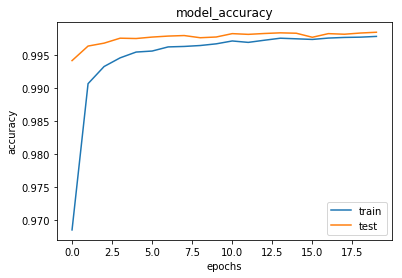

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train', 'test'], loc = "lower right")
plt.show()

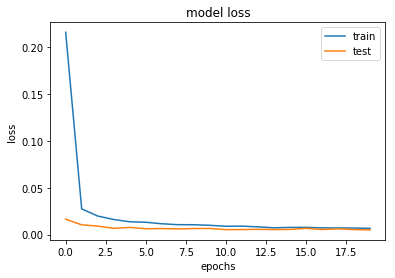

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc = "upper right")
plt.show()

In [10]:
predictions = model.predict(x_test)
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 86us/step


In [11]:
score

[0.0050374322004056015, 0.9984199968338012]